# K means

In [1]:
# prerequisites 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_pd = pd.read_csv('train_data/Kmean_dataset.csv')
data_pd

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
x = data_pd.to_numpy()

In [4]:
x.max() #before normalization

1680.0

In [5]:
x2 = (x-np.mean(x,axis=0))/np.std(x,axis=0)
np.random.seed(7)

In [6]:
x2.max() #after normalization

4.371372139554768

In [7]:
def Kmeans(k,x,iters):
    mu = np.random.permutation(x)[:k,:] #randomly shuffeling the x data to get k centers for initialsing the centroids
    for i in range(iters):
        distance = np.sum(np.square(x),axis=1,keepdims=1)+np.sum(np.square(mu),axis=1) - 2*(x@mu.T) #shape = 178,k
        y = np.argmin(distance,axis=1,keepdims=True)
        for j in range(k):
            mu[j] = np.mean(x[y.reshape(-1)==j],axis=0) #updating the centroid to the new average
        cost = np.sum(np.square(x-mu[y.reshape(-1)]))
    return cost

[2314.0, 1658.7588524290954, 1277.928488844642, 1214.140005993505, 1169.3468737941341, 1081.112322916048, 1018.3274792902844, 948.1430298367509, 918.6207256369255, 871.9489563001846]
Time taken = 3.4989027976989746 seconds


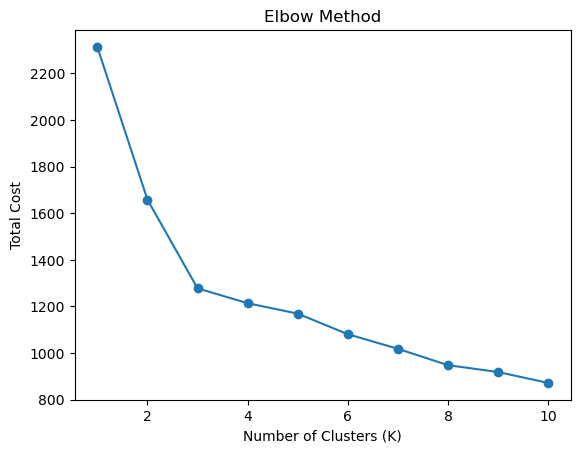

In [11]:
import time
s = time.time()
K_val = [i for i in range(1,11)]
number_of_iterations = 500
cost_his = []
for k in (K_val):
    cost_his.append(Kmeans(k,x2,number_of_iterations))
plt.plot(K_val , cost_his,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Total Cost')
plt.title('Elbow Method')
print(cost_his)
print(f'Time taken = {(time.time()-s)} seconds')

### t-SNE method can be used for visualisation - which helps to visualise the multi dimensional data into 2 , 3.. dimensions so that it can be visualised easily.

# K = 3 will be the best choice according to elbow method